In [1]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

PATH_TO_SEG = "/home/n_stolyarov/HDD/Datasets/SberMerged/test/Semantic_fisheye_palette/206.png"

In [2]:
def getBordered(image, width=10, thresh=100):
    img = Image.fromarray((image*40).astype(np.uint8))
    img = img.convert('L')
    image = np.array(img)
    bg = np.zeros(image.shape)
    threshed = cv2.Canny(image, threshold1=thresh, threshold2=2*thresh)

    contours, _ = cv2.findContours(threshed.copy(),
                                   cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        cv2.drawContours(bg, [contour], 0, (255, 255, 255), width)
    return cv2.drawContours(bg, contours, 0, (255, 255, 255), width).astype(bool)

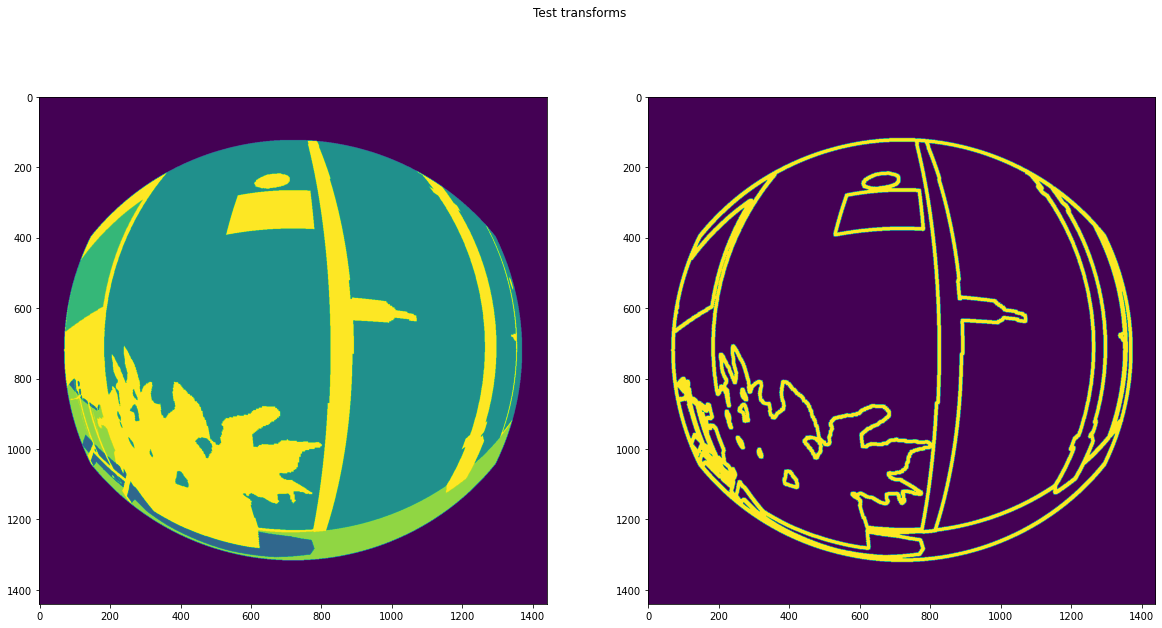

In [3]:
img = Image.open(PATH_TO_SEG)
edges = getBordered(np.asarray(img))
fig, axes = plt.subplots(1, 2)
fig.suptitle('Test transforms')
fig.set_size_inches(20, 10)
axes[0].imshow(np.asarray(img))
axes[1].imshow((edges))
plt.show()
